### Importing necessary libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression as SK_LogisticRegression
from typing import List
from sklearn.neural_network import MLPClassifier as MLP_Classifier

### Data Exploration

We will explore the dataset for a better understanding of its structure and key characteristics. The attributes that we will work with are:

- mean_blood_sugar_level: The average blood sugar level over the observation period of the subject
  
- cardiovascular_issues: Whether the subject has a history of cardiovascular issues
  
- job_category: The field in which the person works
  
- body_mass_indicator: Body mass index, indicating whether the person is underweight, normal weight, overweight, or obese
  
- sex: The gender of the person
  
- tobacco_usage: Indicator for smokers, current or past
  
- high_blood_pressure: Binary attribute indicating whether a person suffers from high blood pressure
  
- married: Binary attribute indicating whether the person has ever been married
  
- living_area: The type of area where the person has lived most of their life
  
- years_old: The age of the person in years
  
- chaotic_sleep: Binary attribute for an irregular sleep schedule
  
- analysis_results: The results of the person's medical tests, which may include various measurements and indicators relevant to their health
  
- biological_age_index: An index estimating the biological age of a person based on various factors such as lifestyle, health status, etc. The value is measured in an unknown unit
  
- cerebrovascular_accident: Binary indicator of whether the person has had a stroke

As it can be seen, most of the data is of numerical type, and the rest of it is of type 'object'. Also, there are **201 missing values for 'body_mass_indicator' and 511 missing values for 'married' and 'analysis_results'**.


In [40]:
full_dataset = pd.read_csv('tema2_AVC/AVC_full.csv')

# printing the first 10 rows of the dataset
print(full_dataset.head(10))

   mean_blood_sugar_level  cardiovascular_issues     job_category  \
0                  228.69                      1   private_sector   
1                  202.21                      0  entrepreneurial   
2                  105.92                      1   private_sector   
3                  171.23                      0   private_sector   
4                  174.12                      0  entrepreneurial   
5                  186.21                      0   private_sector   
6                   70.09                      1   private_sector   
7                   94.39                      0   private_sector   
8                   76.15                      0   private_sector   
9                   58.57                      0   private_sector   

   body_mass_indicator sex tobacco_usage  high_blood_pressure married  \
0                 36.6   M     ex-smoker                    0       Y   
1                  NaN   F    non-smoker                    0       Y   
2                 32.

In [41]:
# printing the data types for a better understanding of the dataset
print(full_dataset.dtypes)

mean_blood_sugar_level      float64
cardiovascular_issues         int64
job_category                 object
body_mass_indicator         float64
sex                          object
tobacco_usage                object
high_blood_pressure           int64
married                      object
living_area                  object
years_old                   float64
chaotic_sleep                 int64
analysis_results            float64
biological_age_index        float64
cerebrovascular_accident      int64
dtype: object


The dataset contains numerical values with the following characteristics:

#### `mean_blood_sugar_level`
- **Count**: 5110
- **Mean**: 106.15
- **Standard Deviation**: 45.28
- **Min**: 55.12
- **25th Percentile**: 77.25
- **Median (50th Percentile)**: 91.89
- **75th Percentile**: 114.09
- **Max**: 271.74
- **Interpretation**: The mean blood sugar level is 106.15, with values ranging from 55.12 to 271.74. The distribution appears to be right-skewed with a higher standard deviation.

#### `cardiovascular_issues`
- **Count**: 5110
- **Mean**: 0.05
- **Standard Deviation**: 0.23
- **Min**: 0
- **25th Percentile**: 0
- **Median (50th Percentile)**: 0
- **75th Percentile**: 0
- **Max**: 1
- **Interpretation**: Cardiovascular issues are rare in this dataset, with a mean of 0.05 and most values being 0 (no issues).

#### `body_mass_indicator`
- **Count**: 4909
- **Mean**: 28.89
- **Standard Deviation**: 7.85
- **Min**: 10.3
- **25th Percentile**: 23.5
- **Median (50th Percentile)**: 28.1
- **75th Percentile**: 33.1
- **Max**: 97.6
- **Interpretation**: The body mass indicator shows a mean of 28.89, indicating an average BMI in the overweight range. There is a wide range with some outliers.

#### `high_blood_pressure`
- **Count**: 5110
- **Mean**: 0.10
- **Standard Deviation**: 0.30
- **Min**: 0
- **25th Percentile**: 0
- **Median (50th Percentile)**: 0
- **75th Percentile**: 0
- **Max**: 1
- **Interpretation**: High blood pressure is uncommon in this dataset, with a mean of 0.10 and most individuals not having high blood pressure.

#### `years_old`
- **Count**: 5110
- **Mean**: 46.57
- **Standard Deviation**: 26.59
- **Min**: 0.08
- **25th Percentile**: 26
- **Median (50th Percentile)**: 47
- **75th Percentile**: 63.75
- **Max**: 134
- **Interpretation**: The age distribution is broad, with ages ranging from 0.08 to 134 years. The mean age is 46.57, suggesting a wide age range in the dataset.

#### `chaotic_sleep`
- **Count**: 5110
- **Mean**: 0.05
- **Standard Deviation**: 0.23
- **Min**: 0
- **25th Percentile**: 0
- **Median (50th Percentile)**: 0
- **75th Percentile**: 0
- **Max**: 1
- **Interpretation**: Chaotic sleep patterns are infrequent, with a mean of 0.05 and most individuals reporting no issues.

#### `analysis_results`
- **Count**: 4599
- **Mean**: 323.52
- **Standard Deviation**: 101.58
- **Min**: 104.83
- **25th Percentile**: 254.65
- **Median (50th Percentile)**: 301.03
- **75th Percentile**: 362.82
- **Max**: 756.81
- **Interpretation**: The analysis results show a mean value of 323.52, with values ranging widely, indicating diverse health measurement outcomes.

#### `biological_age_index`
- **Count**: 5110
- **Mean**: 134.78
- **Standard Deviation**: 50.40
- **Min**: -15.11
- **25th Percentile**: 96.71
- **Median (50th Percentile)**: 136.37
- **75th Percentile**: 172.51
- **Max**: 266.99
- **Interpretation**: The biological age index has a mean of 134.78, with a broad range of values indicating variability in biological aging among individuals.

#### `cerebrovascular_accident (target variable)`
- **Count**: 5110
- **Mean**: 0.05
- **Standard Deviation**: 0.22
- **Min**: 0
- **25th Percentile**: 0
- **Median (50th Percentile)**: 0
- **75th Percentile**: 0
- **Max**: 1
- **Interpretation**: Cerebrovascular accidents are rare, with a mean of 0.05 and most individuals not having experienced a stroke.


In [42]:
# getting a general overview of the dataset: count, mean, std, min, 25%, 50%, 75%, max
print(full_dataset.describe())

       mean_blood_sugar_level  cardiovascular_issues  body_mass_indicator  \
count             5110.000000            5110.000000          4909.000000   
mean               106.147677               0.054012            28.893237   
std                 45.283560               0.226063             7.854067   
min                 55.120000               0.000000            10.300000   
25%                 77.245000               0.000000            23.500000   
50%                 91.885000               0.000000            28.100000   
75%                114.090000               0.000000            33.100000   
max                271.740000               1.000000            97.600000   

       high_blood_pressure    years_old  chaotic_sleep  analysis_results  \
count          5110.000000  5110.000000    5110.000000       4599.000000   
mean              0.097456    46.568665       0.054012        323.523446   
std               0.296607    26.593912       0.226063        101.577442   
mi

The dataset contains categorical values with the following characteristics:

#### `job_category`
- **Count**: 5110
- **Unique**: 5
- **Top**: private_sector
- **Frequency**: 2925
- **Interpretation**: The most common job category is 'private_sector', with 2925 occurrences out of 5110.

#### `sex`
- **Count**: 5110
- **Unique**: 2
- **Top**: F
- **Frequency**: 2994
- **Interpretation**: The dataset has more females (F) with 2994 occurrences out of 5110.

#### `tobacco_usage`
- **Count**: 5110
- **Unique**: 4
- **Top**: non-smoker
- **Frequency**: 1892
- **Interpretation**: The most common tobacco usage status is 'non-smoker', with 1892 occurrences out of 5110.

#### `married`
- **Count**: 4599
- **Unique**: 2
- **Top**: Y
- **Frequency**: 3014
- **Interpretation**: The majority of the individuals are married (Y), with 3014 occurrences out of 4599.

#### `living_area`
- **Count**: 5110
- **Unique**: 2
- **Top**: City
- **Frequency**: 2596
- **Interpretation**: The most common living area is 'City', with 2596 occurrences out of 5110.


In [43]:
print(full_dataset.describe(include=['object']))

          job_category   sex tobacco_usage married living_area
count             5110  5110          5110    4599        5110
unique               5     2             4       2           2
top     private_sector     F    non-smoker       Y        City
freq              2925  2994          1892    3014        2596


In [44]:
# getting the number of missing values for each column
print(full_dataset.isnull().sum())

mean_blood_sugar_level        0
cardiovascular_issues         0
job_category                  0
body_mass_indicator         201
sex                           0
tobacco_usage                 0
high_blood_pressure           0
married                     511
living_area                   0
years_old                     0
chaotic_sleep                 0
analysis_results            511
biological_age_index          0
cerebrovascular_accident      0
dtype: int64


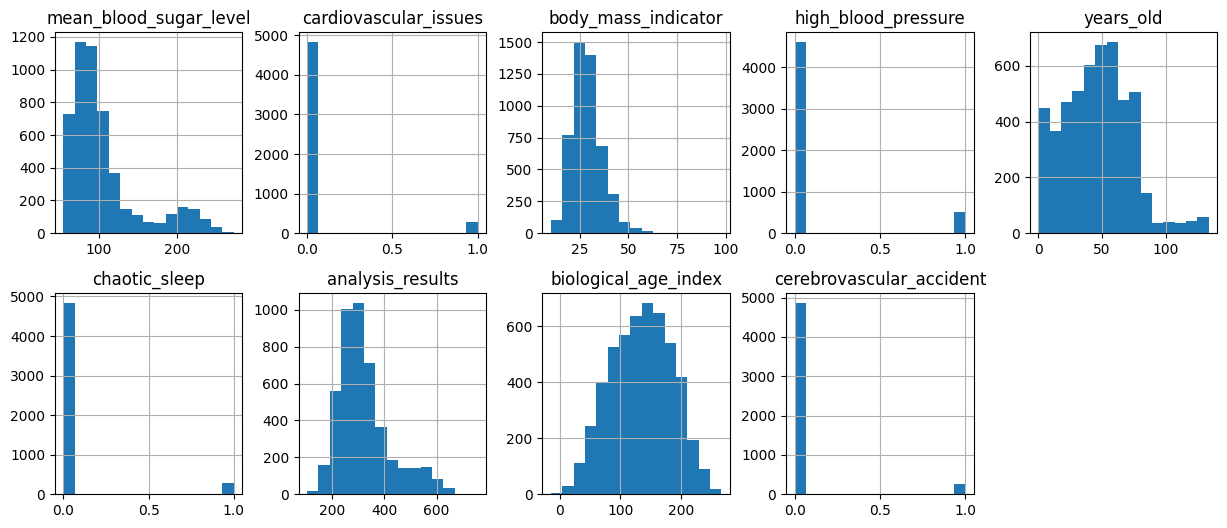

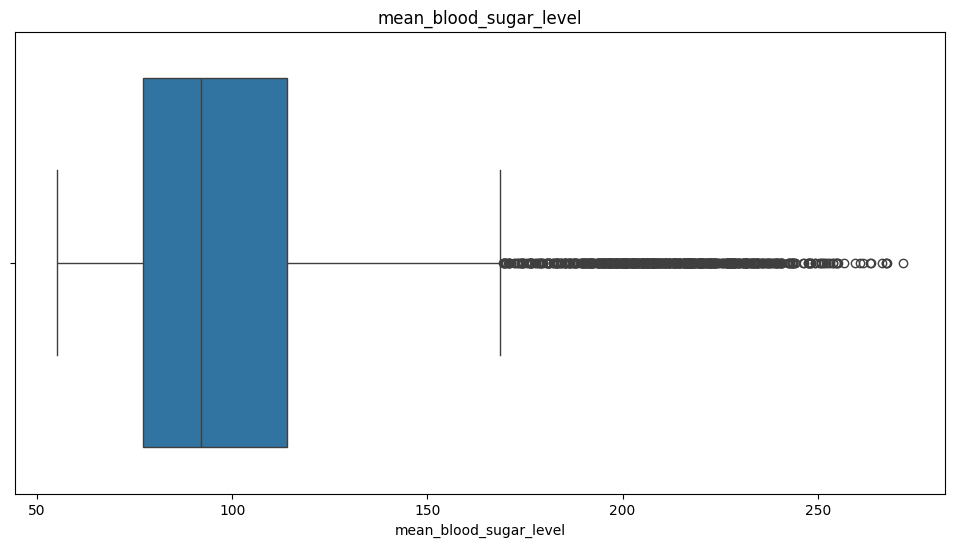

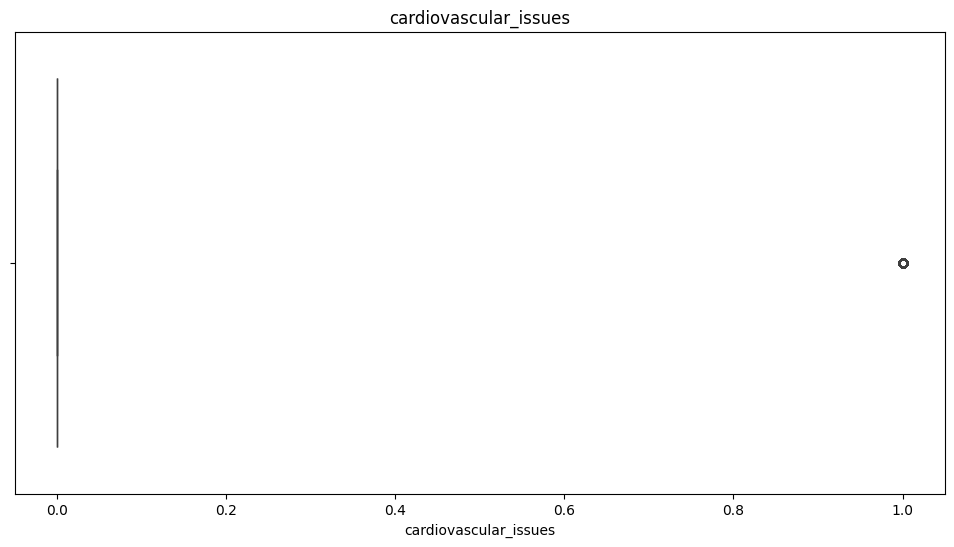

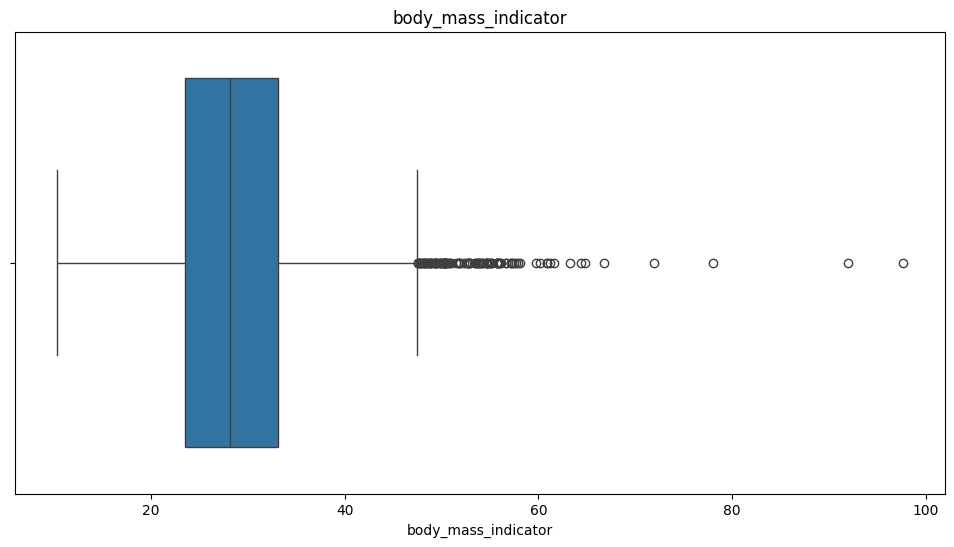

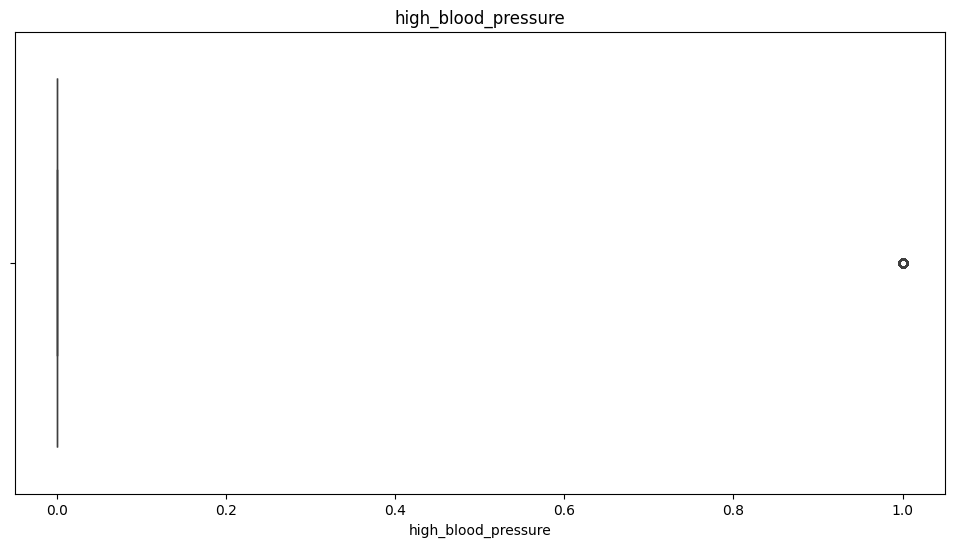

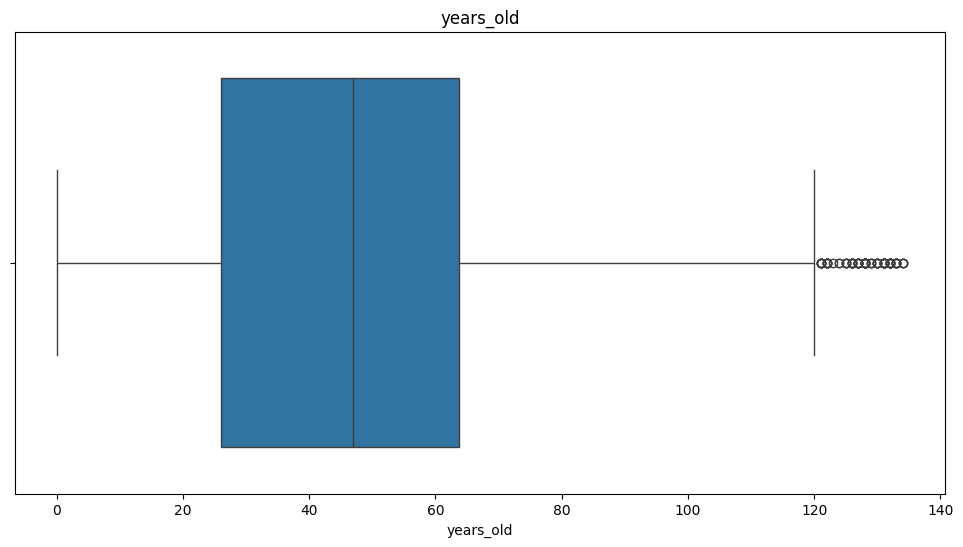

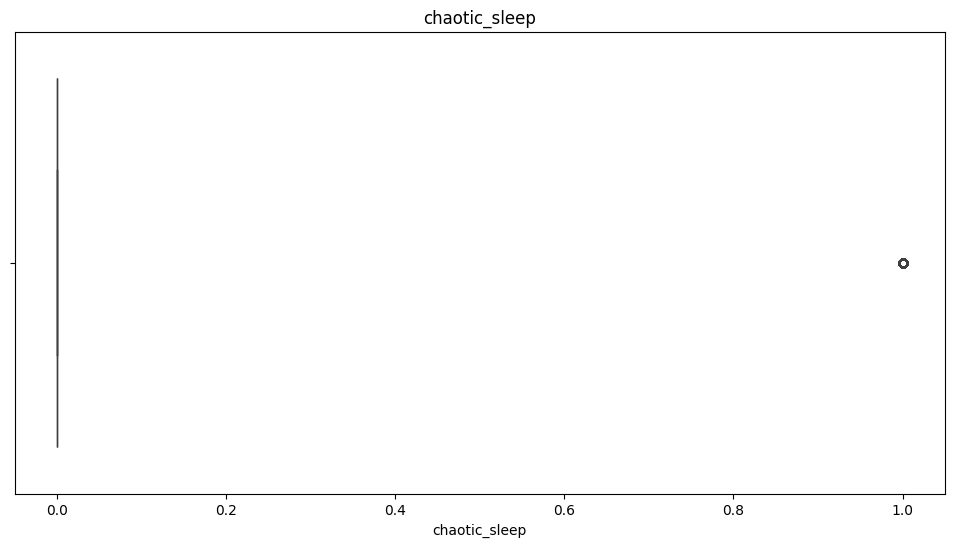

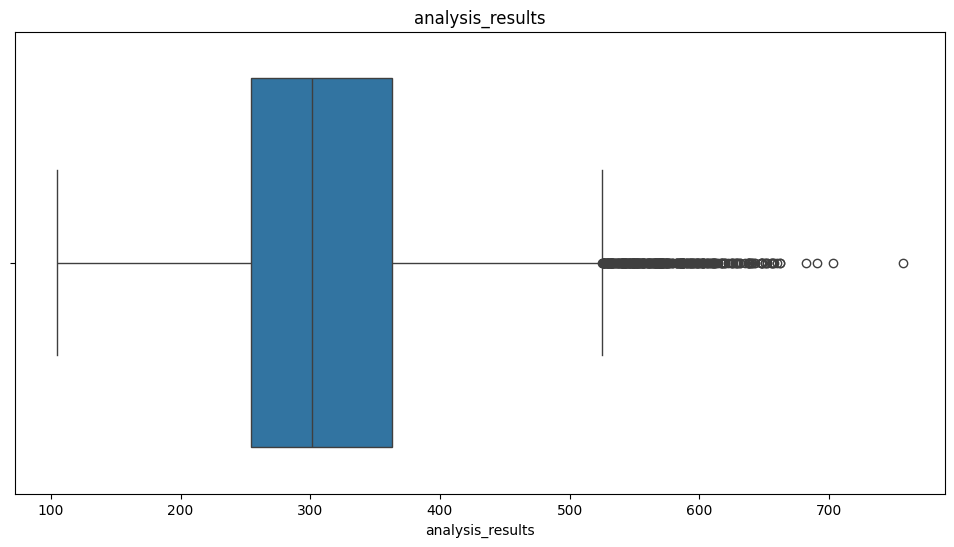

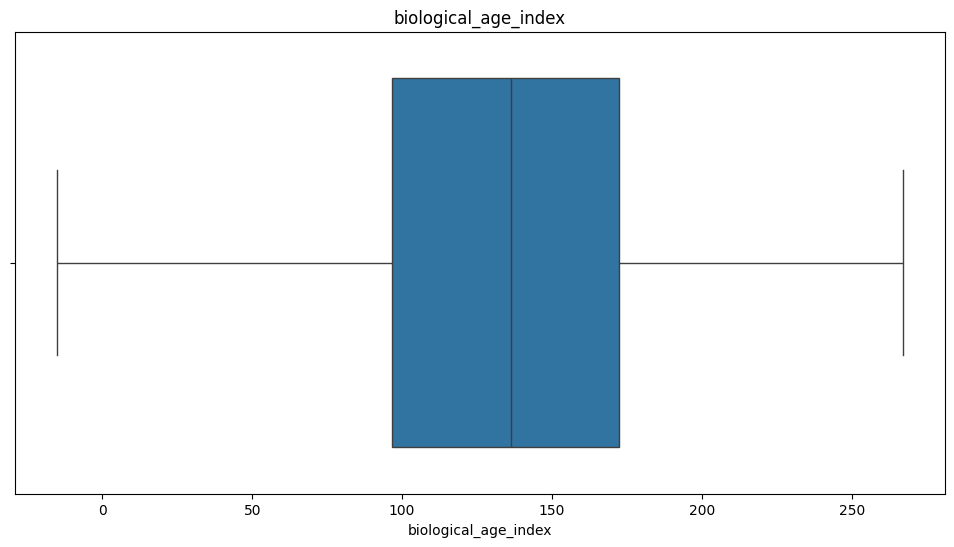

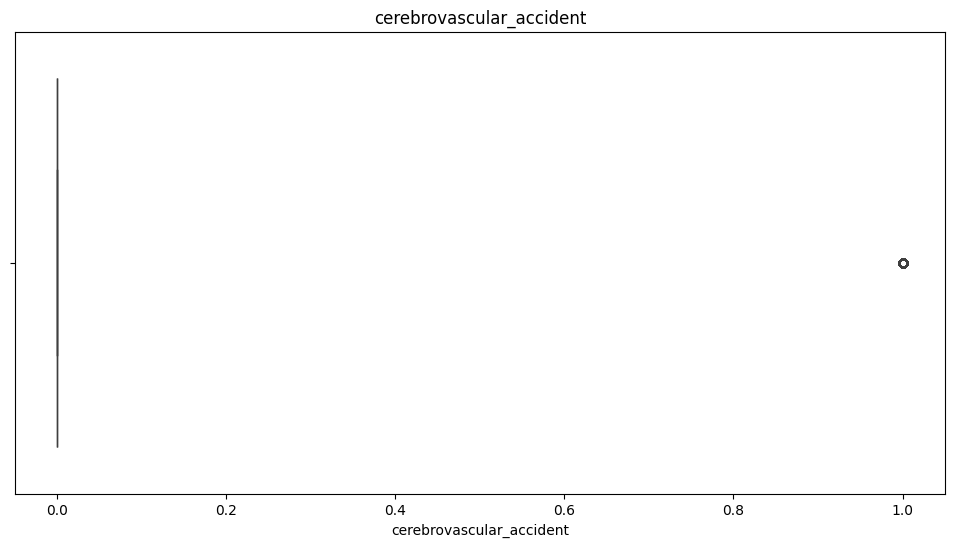

In [45]:
# selecting numerical and categorical columns in 2 lists
numerical_columns = full_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = full_dataset.select_dtypes(include='object').columns.tolist()

full_dataset[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 5), ) # getting histograms for numerical columns
plt.show()

for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=full_dataset[column])
    plt.title(column)
    plt.show()

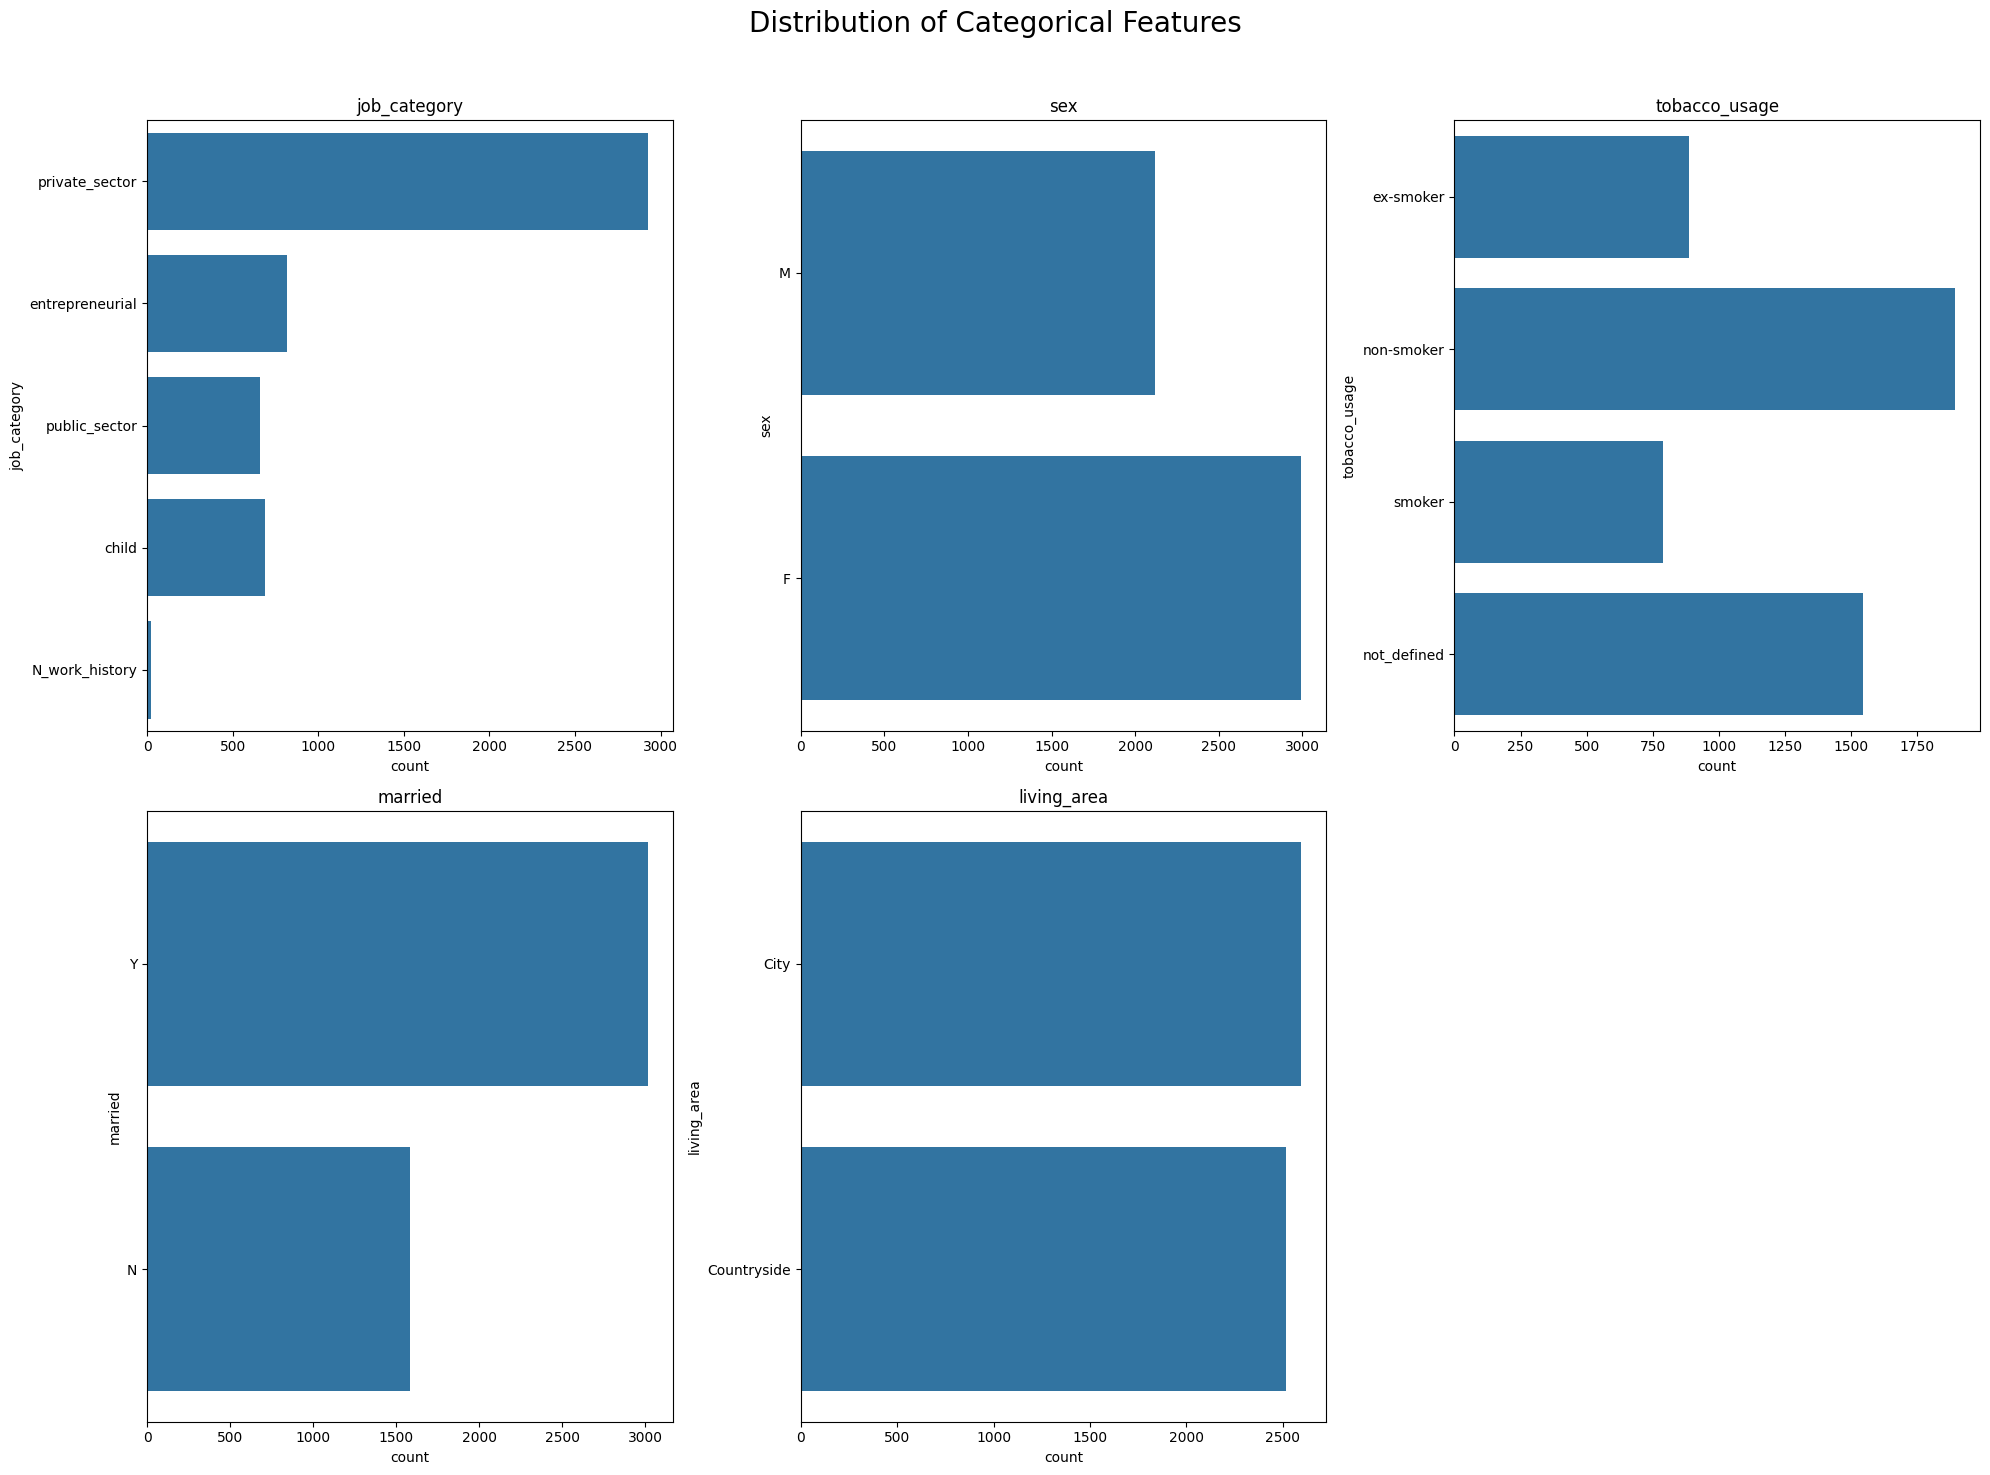

In [46]:
# analyzing the categorical columns
num_cols = 3
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
fig.suptitle('Distribution of Categorical Features', fontsize=20)

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(y=column, data=full_dataset, ax=axes[i])
    axes[i].set_title(column)

# unused plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Splitting into categorical, binary, numerical, and ordinal features
Let's see how our dataset is devided.

['job_category', 'tobacco_usage', 'years_old'] ['cardiovascular_issues', 'sex', 'high_blood_pressure', 'married', 'living_area', 'chaotic_sleep', 'cerebrovascular_accident'] ['mean_blood_sugar_level', 'cardiovascular_issues', 'body_mass_indicator', 'high_blood_pressure', 'years_old', 'chaotic_sleep', 'analysis_results', 'biological_age_index', 'cerebrovascular_accident'] ['years_old']


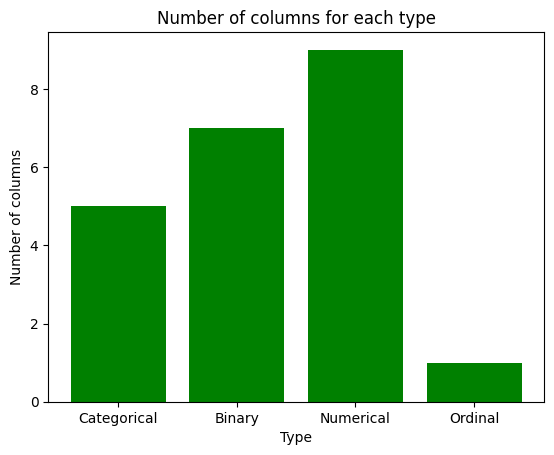

In [47]:
# after watching the dataset, we will split it into those columns

def split_types(data):
    categorical = []
    binary = []
    numerical = []
    ordinal = []
    ordinal.append('years_old') # manually creating this
    for column in data.columns:
        if data[column].nunique() == 2:
            binary.append(column)
        elif pd.api.types.is_numeric_dtype(data[column]) and column not in ordinal:
            numerical.append(column)
        else:
            categorical.append(column)
    
    return categorical, binary, numerical, ordinal

categorical_types, binary_types, numerical_types, ordinal_types = split_types(full_dataset)
print(categorical_types, binary_types, numerical_columns, ordinal_types)

# creating a histogram to see the differences
counts = {
          'Categorical': len(categorical_columns),
          'Binary': len(binary_types),
          'Numerical': len(numerical_columns),
          'Ordinal': len(ordinal_types)
         }
plt.bar(counts.keys(), counts.values(), color='green')
plt.title('Number of columns for each type')
plt.xlabel('Type')
plt.ylabel('Number of columns')
plt.show()



### Correlation Matrix for Numerical Values

Finally, for a much better understanding of this dataset, we will use a correlation matrix for the numerical values in order to potentially find redundancy. What we observed:

*Low correlations*:
- **mean_blood_sugar_level** and **cardiovascular_issues** have a correlation of 0.16, indicating a weak positive correlation.
- **body_mass_indicator** and **cardiovascular_issues** have a correlation of 0.041, indicating almost no linear relationship.

*High correlations*:
- **mean_blood_sugar_level** and **analysis_results** with a correlation of 0.89, indicating a very strong positive correlation. This suggests that these two features likely represent similar information, making one of them potentially redundant.
- **years_old** and **biological_age_index** with a correlation of 0.71, indicating a strong positive correlation.

*Negative correlations*:
- **cardiovascular_issues** and **chaotic_sleep** have a correlation of 1, meaning they perform the same on the dataset.
- **cerebrovascular_accident** and **body_mass_indicator** have a correlation of 0.042, which is a very weak positive correlation, almost negligible.
- **cerebrovascular_accident** and **mean_blood_sugar_level** have a correlation of 0.13, indicating a weak positive correlation.

#### Summary of correlation matrix:
The strong correlation between mean_blood_sugar_level and analysis_results suggests that one of these features might be redundant. This redundancy should be considered during feature selection or model training to avoid multicollinearity.

Most features have weak linear relationships with each other, implying that they might contribute unique information to the model.

The weak correlations suggest that the features are largely independent of each other, which can be beneficial for certain machine learning algorithms that assume feature independence. For example, Naive Bayes assumes that the features are independent of each other. This assumption is called the "naive" assumption, and it simplifies the computation and the model. This can be advantageous for algorithms that assume or benefit from independent features, leading to simpler, more interpretable models and potentially better performance in certain cases.


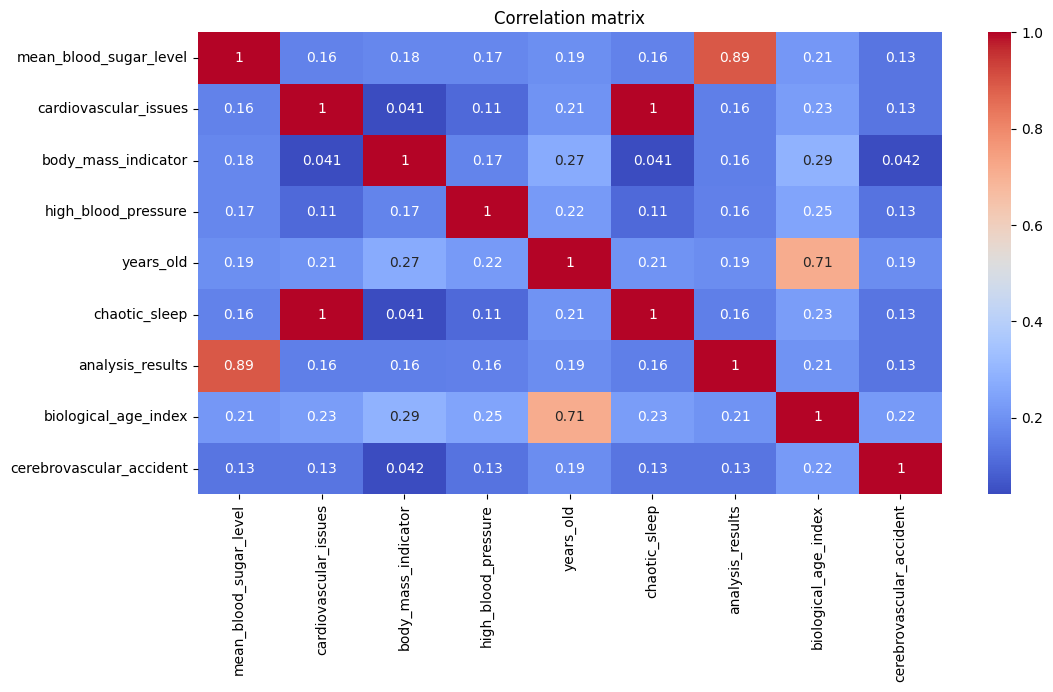

In [48]:
correlation_matrix = full_dataset[numerical_columns].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

### Interpretation of Correlation Analysis for Categorical Variables

We analyzed the correlations between the categorical variables in the dataset using the Chi-Squared test and visualized the results in heatmaps.

#### P-Value Matrix

- **Significant Associations**:
  - **job_category** and **sex** have a p-value of 1.5e-08, indicating a statistically significant association.
  - **job_category** and **tobacco_usage** have a p-value of 3.1e-290, indicating a very strong significant association.
  - **sex** and **tobacco_usage** have a p-value of 2e-11, indicating a statistically significant association.
  - **tobacco_usage** and **married** have a p-value of 9.4e-116, indicating a very strong significant association.
  - **married** and **living_area** have a p-value of 0.99, indicating a very strong significant association.

- **Non-Significant Associations**:
  - **job_category** and **living_area** have a p-value of 0.32, suggesting a non-significant relationship.
  - **sex** and **living_area** have a p-value of 0.67, suggesting a non-significant relationship.
  - **tobacco_usage** and **living_area** have a p-value of 0.14, suggesting a non-significant relationship.
  - **married** and **sex** have a p-value of 0.089, suggesting a non-significant relationship.

### Summary

1. **Strong Associations**: There are strong associations between `job_category` and `tobacco_usage`, `sex` and `tobacco_usage`, and `tobacco_usage` and `married`.
2. **Statistical Significance**: Most associations are statistically significant.
3. **Potential Non-Significant Associations**: Some pairs, such as `job_category` and `living_area`, and `sex` and `living_area`, do not have significant associations.


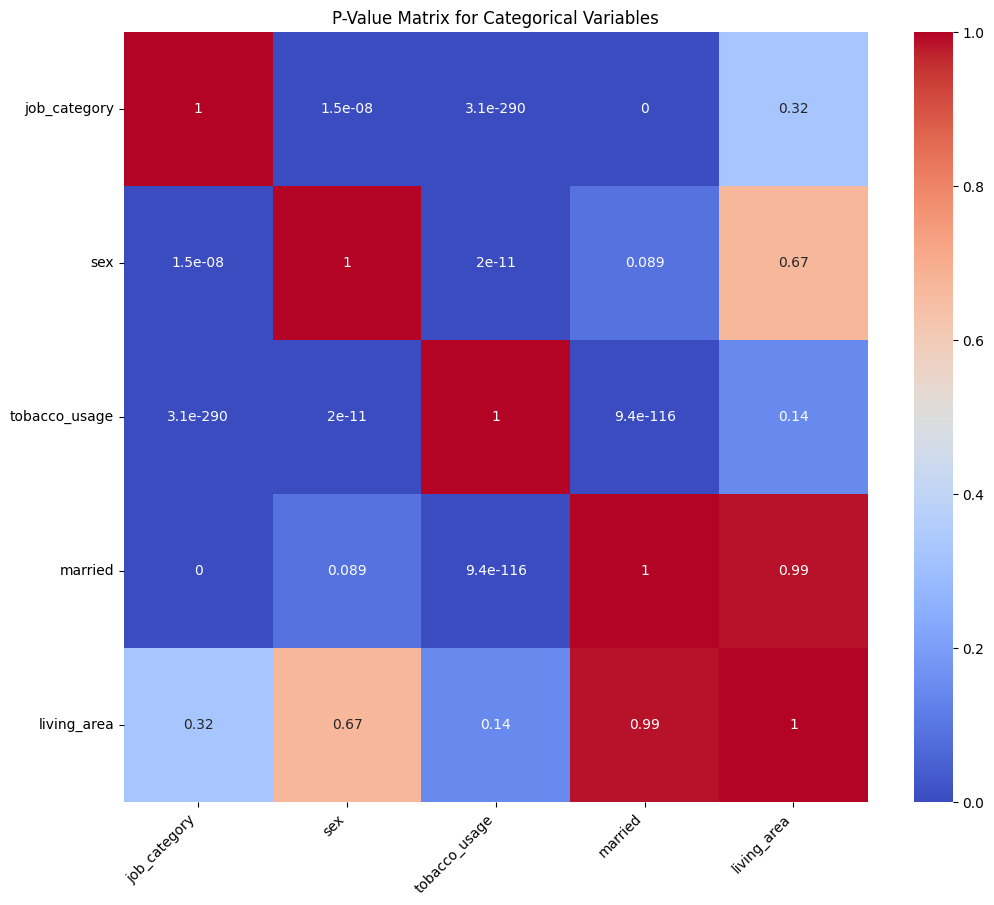

In [49]:
def chi2_correlation_matrix(data, columns):
    chi2_matrix = pd.DataFrame(index=columns, columns=columns)
    p_value_matrix = pd.DataFrame(index=columns, columns=columns)

    for col1 in columns:
        for col2 in columns:
            if col1 == col2:
                chi2_matrix.loc[col1, col2] = 1
                p_value_matrix.loc[col1, col2] = 1
                continue
            
            contingency_table = pd.crosstab(data[col1], data[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            chi2_matrix.loc[col1, col2] = chi2
            p_value_matrix.loc[col1, col2] = p

    chi2_matrix = chi2_matrix.astype(float)
    p_value_matrix = p_value_matrix.astype(float)
    return chi2_matrix, p_value_matrix

chi2_matrix, p_value_matrix = chi2_correlation_matrix(full_dataset, categorical_columns)


plt.figure(figsize=(12, 10))
sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, xticklabels=p_value_matrix.columns, yticklabels=p_value_matrix.index)
plt.title("P-Value Matrix for Categorical Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### Data Preprocessing
In this step we will focus on preprocessing our data:
- handle missing values
- encode categorical varaibles
- scale numeric features
- handle outliers
- feature selection
- split the data into features and target

This process will focus on all datasets (train, test, full).
We will start by dropping some columns that are too corralated with others.

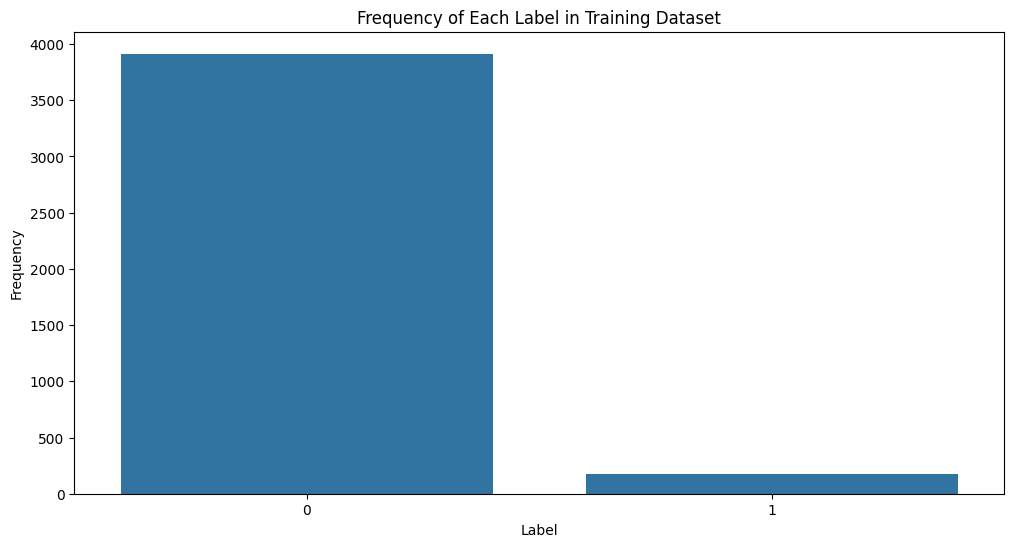

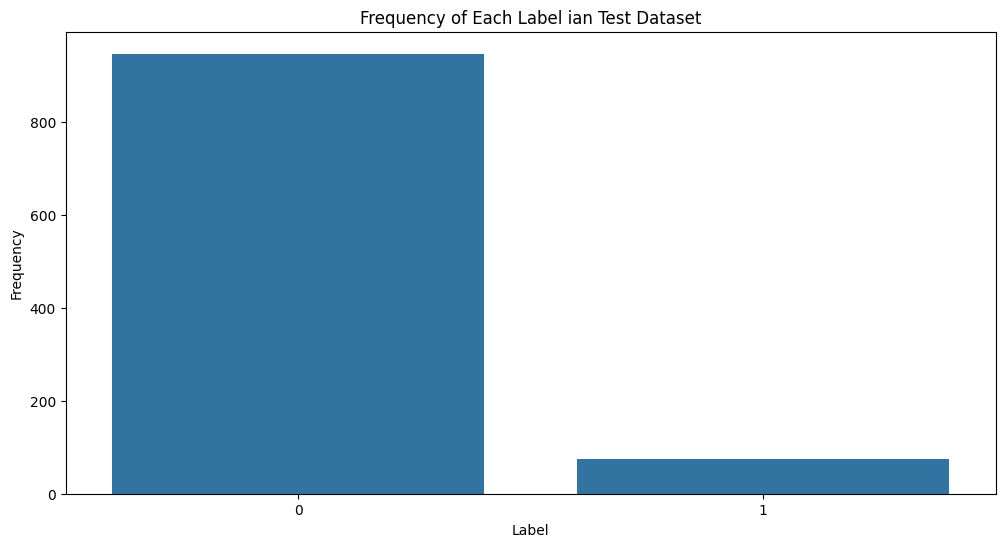

   mean_blood_sugar_level  cardiovascular_issues     job_category  \
0                   93.24                      0   private_sector   
1                   84.56                      0   private_sector   
2                  202.21                      0  entrepreneurial   
3                   78.74                      0   private_sector   
4                   97.16                      0    public_sector   

   body_mass_indicator tobacco_usage  high_blood_pressure  \
0                 28.8    non-smoker                    0   
1                 41.8    non-smoker                    0   
2                  NaN    non-smoker                    0   
3                 42.3        smoker                    0   
4                 33.1   not_defined                    0   

   biological_age_index  cerebrovascular_accident  
0            193.560869                         0  
1            145.234900                         0  
2            130.089915                         1  
3         

In [50]:
# loading data
train_dataset = pd.read_csv('tema2_AVC/AVC_train.csv')
test_dataset = pd.read_csv('tema2_AVC/AVC_test.csv')

# Bar plots for label frequency in training dataset
plt.figure(figsize=(12, 6))
sns.countplot(x='cerebrovascular_accident', data=train_dataset)
plt.title('Frequency of Each Label in Training Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

# Bar plots for label frequency in test dataset
plt.figure(figsize=(12, 6))
sns.countplot(x='cerebrovascular_accident', data=test_dataset)
plt.title('Frequency of Each Label ian Test Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

# dropping too correlated numerical columns
train_dataset.drop(columns= ['analysis_results', 'chaotic_sleep', 'years_old'], inplace=True)
test_dataset.drop(columns= ['analysis_results', 'chaotic_sleep', 'years_old'], inplace=True)
full_dataset.drop(columns= ['analysis_results', 'chaotic_sleep', 'years_old'], inplace=True)

# also dropping categorical columns that are too correlated
train_dataset.drop(columns= ['living_area', 'married', 'sex'], inplace=True)
test_dataset.drop(columns= ['living_area', 'married', 'sex'], inplace=True)
full_dataset.drop(columns= ['living_area', 'married', 'sex'], inplace=True)

print(train_dataset.head(5))
print(test_dataset.head(5))


In [51]:
train_missing = [column for column in train_dataset.columns if train_dataset[column].isnull().any()]
test_missing = [column for column in test_dataset.columns if test_dataset[column].isnull().any()]
full_missing = [column for column in full_dataset.columns if full_dataset[column].isnull().any()]

print("Train missing values:", train_missing)
print("Test missing values:", test_missing)
print("Full missing values:", full_missing)

# we observe that the missing values are in the same columns for both train and test datasets

Train missing values: ['body_mass_indicator']
Test missing values: []
Full missing values: ['body_mass_indicator']


In [52]:
# replacing numeric missing values with the mean of the column
train_numeric_columns = train_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
train_dataset[train_numeric_columns] = train_dataset[train_numeric_columns].fillna(train_dataset[train_numeric_columns].mean())

# replacing categorical missing values with the most frequent value in the column
train_categorical_columns = train_dataset.select_dtypes(include='object').columns.tolist()
train_dataset[train_categorical_columns] = train_dataset[train_categorical_columns].fillna(train_dataset[train_categorical_columns].mode().iloc[0])
print(train_dataset.isnull().sum())

mean_blood_sugar_level      0
cardiovascular_issues       0
job_category                0
body_mass_indicator         0
tobacco_usage               0
high_blood_pressure         0
biological_age_index        0
cerebrovascular_accident    0
dtype: int64


In [53]:
# doing the same for the full dataset
full_numeric_columns = full_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
full_dataset[full_numeric_columns] = full_dataset[full_numeric_columns].fillna(full_dataset[full_numeric_columns].mean())

full_categorical_columns = full_dataset.select_dtypes(include='object').columns.tolist()
full_dataset[full_categorical_columns] = full_dataset[full_categorical_columns].fillna(full_dataset[full_categorical_columns].mode().iloc[0])
print(full_dataset.isnull().sum())

mean_blood_sugar_level      0
cardiovascular_issues       0
job_category                0
body_mass_indicator         0
tobacco_usage               0
high_blood_pressure         0
biological_age_index        0
cerebrovascular_accident    0
dtype: int64


In [54]:
# identify binary columns
binary_columns = [col for col in full_numeric_columns if train_dataset[col].nunique() == 2]
print(binary_columns)

# identify continuous numerical columns
continuous_numeric_columns = [col for col in full_numeric_columns if col not in binary_columns]


train_binary = train_dataset[binary_columns]
test_binary = test_dataset[binary_columns]
full_binary = full_dataset[binary_columns]

# scaling the continuous numerical columns
scaler = StandardScaler()
train_dataset[continuous_numeric_columns] = scaler.fit_transform(train_dataset[continuous_numeric_columns])
test_dataset[continuous_numeric_columns] = scaler.transform(test_dataset[continuous_numeric_columns])
full_dataset[continuous_numeric_columns] = scaler.transform(full_dataset[continuous_numeric_columns])


train_dataset[binary_columns] = train_binary
test_dataset[binary_columns] = test_binary
full_dataset[binary_columns] = full_binary

print(full_dataset.head(5))



['cardiovascular_issues', 'high_blood_pressure', 'cerebrovascular_accident']
   mean_blood_sugar_level  cardiovascular_issues     job_category  \
0                2.748978                      1   private_sector   
1                2.157447                      0  entrepreneurial   
2                0.006447                      1   private_sector   
3                1.465392                      0   private_sector   
4                1.529951                      0  entrepreneurial   

   body_mass_indicator tobacco_usage  high_blood_pressure  \
0             1.012319     ex-smoker                    0   
1             0.000264    non-smoker                    0   
2             0.473905    non-smoker                    0   
3             0.723414        smoker                    0   
4            -0.642318    non-smoker                    1   

   biological_age_index  cerebrovascular_accident  
0              0.922467                         1  
1             -0.103707              

In [55]:
# starting encoding the categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(full_dataset[full_categorical_columns])

train_encoded = encoder.transform(train_dataset[train_categorical_columns])
test_encoded = encoder.transform(test_dataset[train_categorical_columns])
full_encoded = encoder.transform(full_dataset[full_categorical_columns])

train_encoded = pd.DataFrame(train_encoded)
test_encoded = pd.DataFrame(test_encoded)
full_encoded = pd.DataFrame(full_encoded)

train_encoded.columns = encoder.get_feature_names_out(train_categorical_columns)
test_encoded.columns = encoder.get_feature_names_out(train_categorical_columns)
full_encoded.columns = encoder.get_feature_names_out(full_categorical_columns)

train_dataset = train_dataset.drop(columns=train_categorical_columns)
train_dataset = pd.concat([train_dataset, train_encoded], axis=1)

test_dataset = test_dataset.drop(columns=train_categorical_columns)
test_dataset = pd.concat([test_dataset, test_encoded], axis=1)

full_dataset = full_dataset.drop(columns=full_categorical_columns)
full_dataset = pd.concat([full_dataset, full_encoded], axis=1)

print(train_dataset.head(5))


   mean_blood_sugar_level  cardiovascular_issues  body_mass_indicator  \
0               -0.276809                      0        -1.197998e-02   
1               -0.470710                      0         1.695185e+00   
2                2.157447                      0        -4.665436e-16   
3               -0.600721                      0         1.760845e+00   
4               -0.189241                      0         5.526976e-01   

   high_blood_pressure  biological_age_index  cerebrovascular_accident  \
0                    0              1.156185                         0   
1                    0              0.196919                         0   
2                    0             -0.103707                         1   
3                    0              0.320878                         0   
4                    0             -0.665419                         0   

   job_category_child  job_category_entrepreneurial  \
0                 0.0                           0.0   
1     

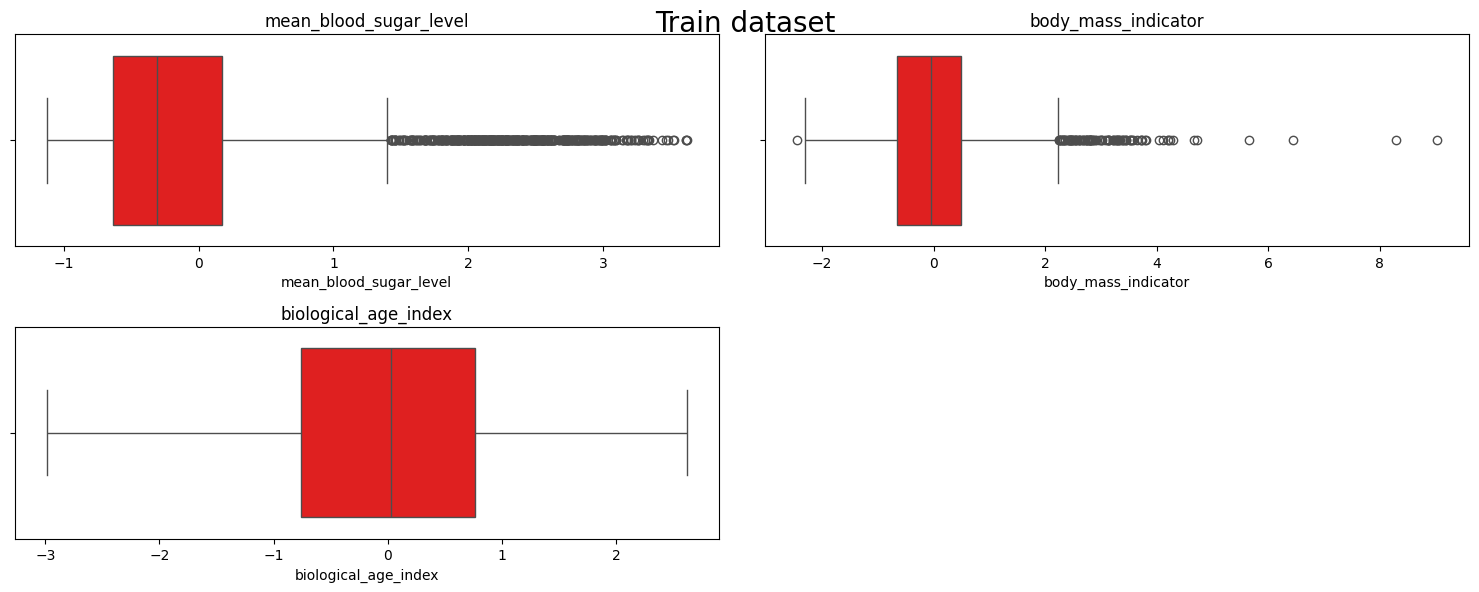

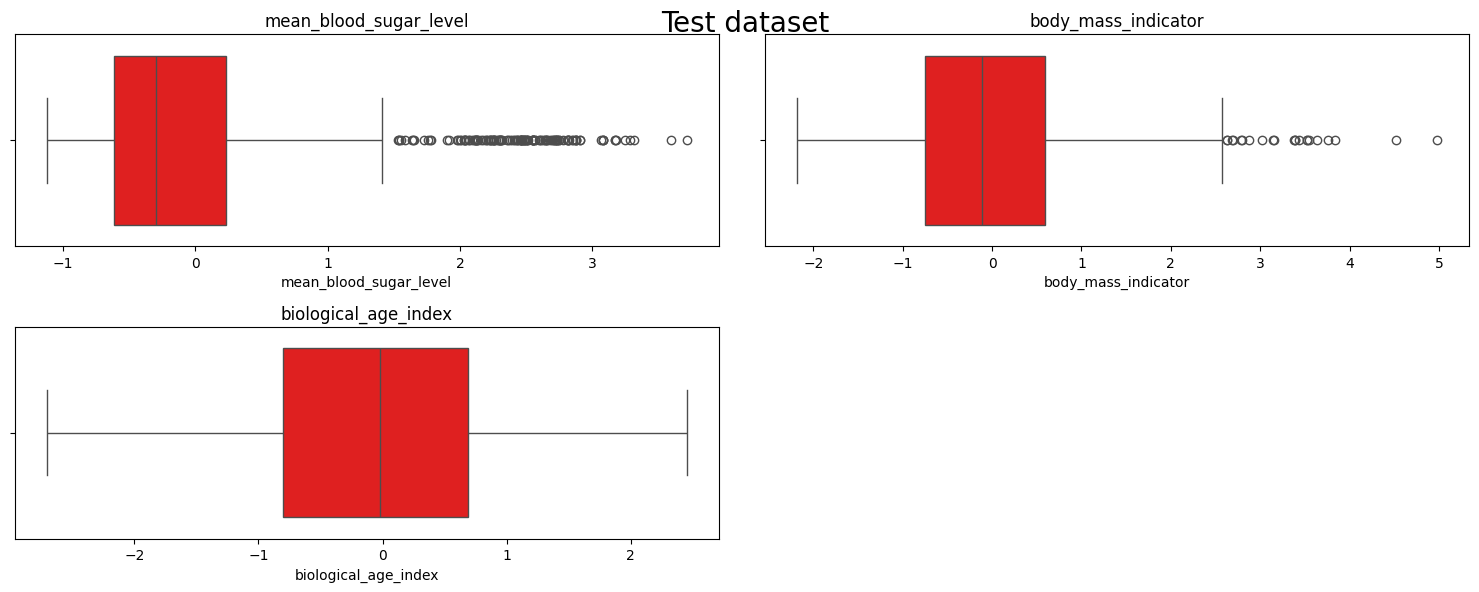

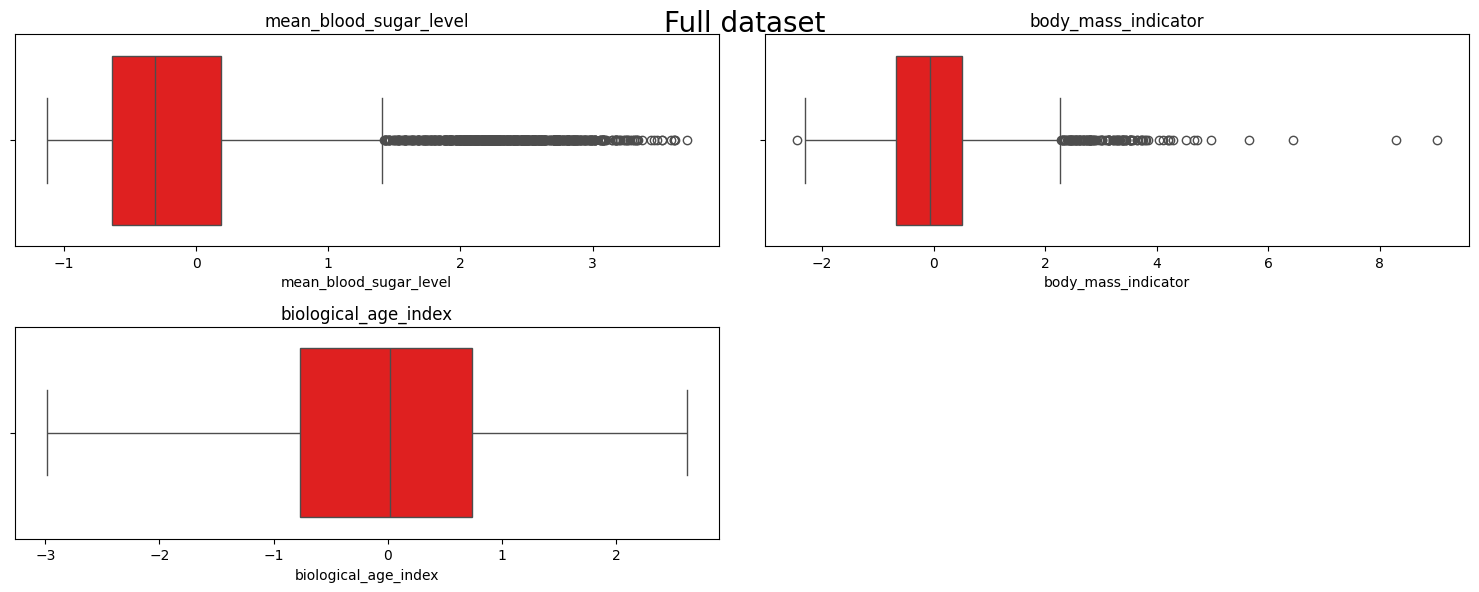

In [56]:
# let's check the plots before removing the outliers
def get_non_binary_columns(data):
    return data.columns[data.nunique() > 2]

def plot_data(data, title):
    columns = get_non_binary_columns(data)
    fig, axes = plt.subplots(nrows=(len(columns) + 1) // 2, ncols=2, figsize=(15, (len(columns) + 1) * 3 // 2))
    axes = axes.flatten()
    for i, column in enumerate(columns):
        sns.boxplot(data[column], ax=axes[i], color='red', orient='h')
        axes[i].set_title(column)
    plt.tight_layout()
    plt.suptitle(title, fontsize=20)
    fig.delaxes(axes[len(columns)])
    plt.show()

plot_data(train_dataset, 'Train dataset')
plot_data(test_dataset, 'Test dataset')
plot_data(full_dataset, 'Full dataset')

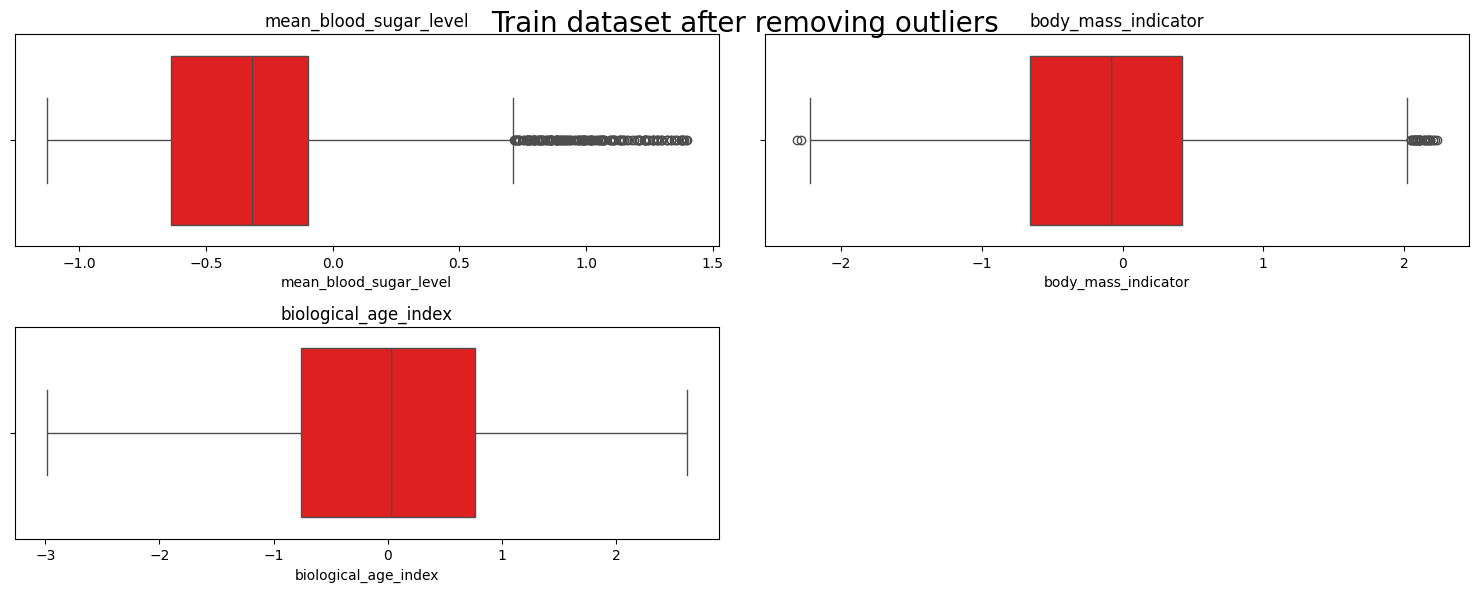

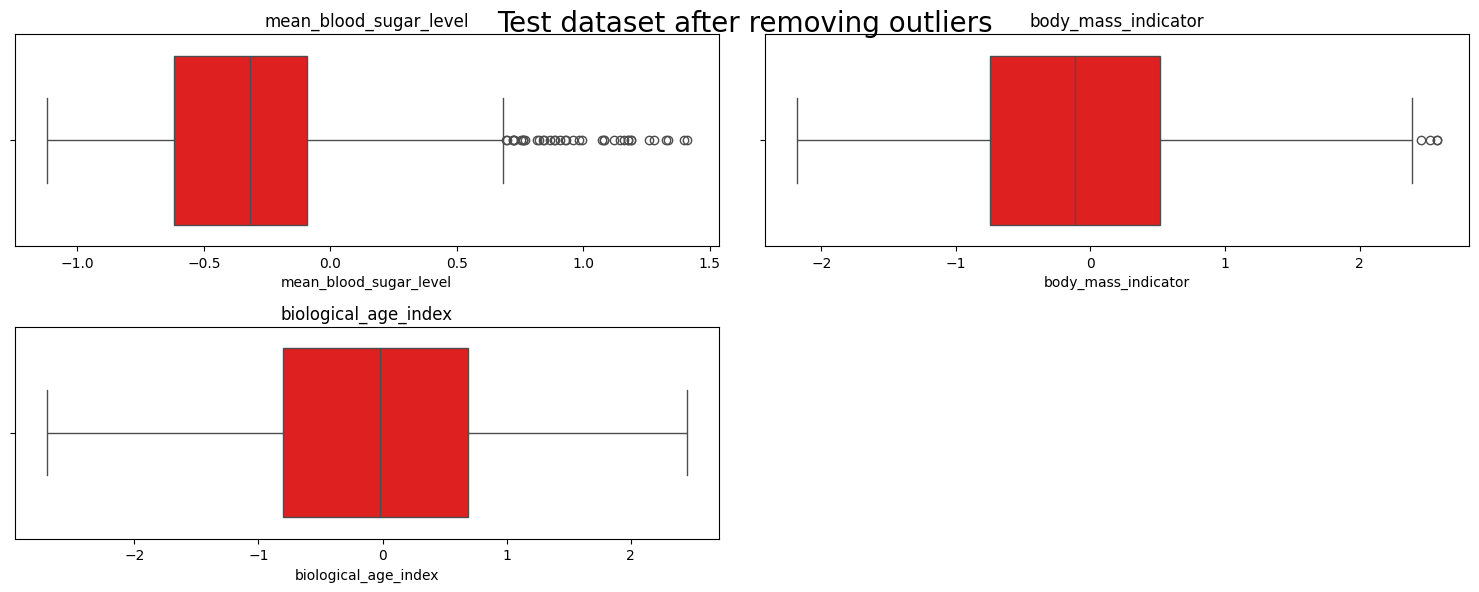

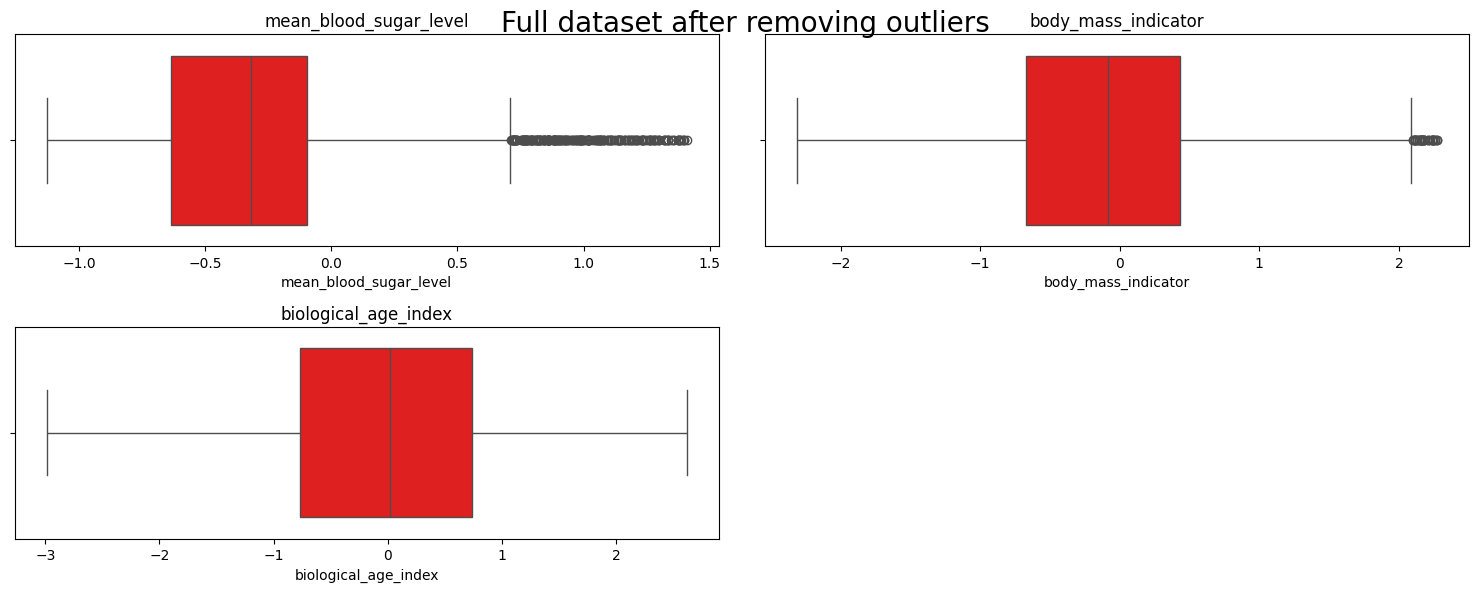

In [57]:
# marking outliers using the IQR method
def mark_outliers(data):
    columns = get_non_binary_columns(data)
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5
        outliers = data[(data[column] < Q1 - threshold * IQR) | (data[column] > Q3 + threshold * IQR)]
        data.loc[outliers.index, column] = np.nan
    return data


train_dataset = mark_outliers(train_dataset)
test_dataset = mark_outliers(test_dataset)
full_dataset = mark_outliers(full_dataset)



# imputing the missing values with iterative imputer
imputer = SimpleImputer(strategy='mean')
train_dataset[train_dataset.columns] = imputer.fit_transform(train_dataset)
test_dataset[test_dataset.columns] = imputer.transform(test_dataset)
full_dataset[full_dataset.columns] = imputer.transform(full_dataset)


plot_data(train_dataset, 'Train dataset after removing outliers')
plot_data(test_dataset, 'Test dataset after removing outliers')
plot_data(full_dataset, 'Full dataset after removing outliers')

### Training And Results

In the next step we will implement several algorithms for training our model. The algorithms used are:
- Manual Logistic Regression
- Scikit-Learn Logistic Regression
- Manual MLP (Multi Layered Perceptron)
- Scikit-Learn MLP

Accuracy = (TN + TP) / (TN + FP + FN + TP)

#### Results:
All Train Test algorithms have `>=92%` accuracy.

In [58]:

def calculate_precision(confusion_matrix):
    return confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])

def calculate_recall(confusion_matrix):
    return confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])

def calculate_f1_score(confusion_matrix):
    precision = calculate_precision(confusion_matrix)
    recall = calculate_recall(confusion_matrix)
    return 2 * precision * recall / (precision + recall)

### Logistic Regression

In [59]:
# splitting the datasets
target_val = 'cerebrovascular_accident'
X = full_dataset.drop(columns=target_val)
T = full_dataset[target_val]

X_train = train_dataset.drop(columns=target_val, axis=1)
y_train = train_dataset[target_val]
X_test = test_dataset.drop(columns=target_val)
y_test = test_dataset[target_val]

# adding bias column
X_train = np.concatenate([X_train.values, np.ones((X_train.shape[0], 1))], axis=1)
X_test = np.concatenate([X_test.values, np.ones((X_test.shape[0], 1))], axis=1)
X = np.concatenate([X.values, np.ones((X.shape[0], 1))], axis=1)



In [60]:
# visualizing the dataset function
def visualize_dataset(X, T, Y=None, w=None, other_w=None):
    m = ["x", "o"]  # Indicates true class
    col = ["red", "blue"]  # Indicates prediction
    fig = plt.figure(); plt.axis('equal')
    if Y is not None:
        idx_tp = np.logical_and(T >= .5, Y >= .5) # True positives
        idx_fp = np.logical_and(T < .5, Y >= .5) # False positives
        idx_fn = np.logical_and(T >= .5, Y < .5) # False negatives
        idx_tn = np.logical_and(T < .5, Y < .5) # True negatives
        
        plt.scatter(X[idx_tp,0], X[idx_tp,1], marker=m[0], c="red", label="TP")
        plt.scatter(X[idx_fp,0], X[idx_fp,1], marker=m[1], c="red", label="FP")
        plt.scatter(X[idx_fn,0], X[idx_fn,1], marker=m[0], c="blue", label="FN")
        plt.scatter(X[idx_tn,0], X[idx_tn,1], marker=m[1], c="blue", label="TN")

    else:
        idx_pos, idx_neg = (T > .5), (T < .5)
        plt.scatter(X[idx_pos,0], X[idx_pos,1], marker=m[0], color="blue", label="Pos")
        plt.scatter(X[idx_neg,0], X[idx_neg,1], marker=m[1], color="blue", label="Neg")
    
    if w is not None:
        __x = np.linspace(0, 1, 100)
        __y = -w[0] / w[1] * __x - w[2] / w[1]
        plt.plot(__x, __y, color="black")

    if other_w is not None:
        __x = np.linspace(0, 1, 100)
        __y = -other_w[0] / other_w[1] * __x - other_w[2] / other_w[1]
        plt.plot(__x, __y, color="orange")

    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.show()

In [61]:
# sigmoid logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [62]:
# logistic predicition function
def predict(X, w):
    return sigmoid(np.dot(X, w))

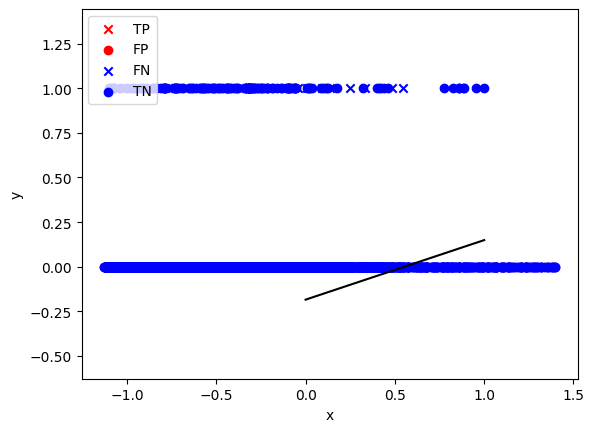

In [63]:
# training and avaluating the model
def train_eval_logistic(X_train, y_train, X_test, y_test, epochs_no, lr=0.01):
    (N, D) = X_train.shape
    w = np.random.randn(D)
    train_acc, test_acc = [], []
    train_nll, test_nll = [], []

    for epoch in range(epochs_no):
        Y_train = predict(X_train, w)
        train_nll.append(-np.mean(y_train * np.log(Y_train) + (1 - y_train) * np.log(1 - Y_train)))
        train_acc.append(np.mean((Y_train > 0.5) == y_train))

        Y_test = predict(X_test, w)
        test_nll.append(-np.mean(y_test * np.log(Y_test) + (1 - y_test) * np.log(1 - Y_test)))
        test_acc.append(np.mean((Y_test > 0.5) == y_test))

        w -= lr * np.dot(X_train.T, Y_train - y_train) / N

    return w, train_nll, test_nll, train_acc, test_acc


w, train_nll, test_nll, train_acc, test_acc = train_eval_logistic(X_train, y_train, X_test, y_test, lr=0.01, epochs_no=1500)
visualize_dataset(X_train[:, :-1], y_train, predict(X_train, w), w)

In [64]:
def calculate_plot_confusion_matrix(TARGET, PREDICTION, title):
    cm = confusion_matrix(TARGET, PREDICTION)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['NO CVA_RISK', 'CVA_RISK'])
    disp.plot(cmap=plt.cm.Greens)
    plt.title(title)
    plt.show()
    return cm

In [65]:
results = {}

Train accuracy: 0.9471624266144814
Test accuracy: 0.9187866927592955


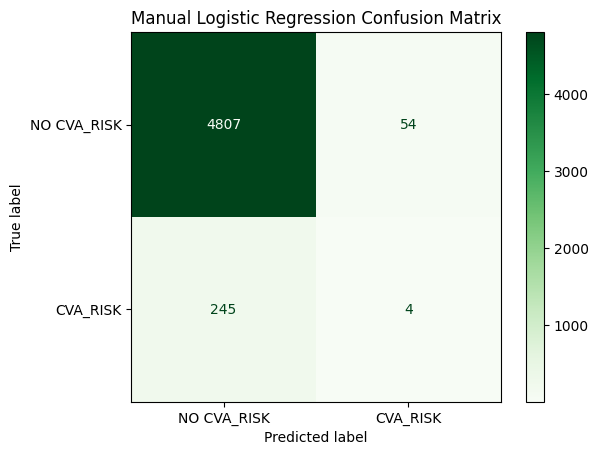

Precision: 0.06896551724137931
Recall: 0.01606425702811245
F1 score: 0.0260586319218241


In [66]:
#  predicting the test dataset
y_pred = predict(X, w)
y_pred = (y_pred > 0.5).astype(int)
print('Train accuracy:', train_acc[-1])
print('Test accuracy:', test_acc[-1])

manual_lr = calculate_plot_confusion_matrix(T, y_pred,  'Manual Logistic Regression Confusion Matrix')
precision = calculate_precision(manual_lr)
recall = calculate_recall(manual_lr)
f1_score = calculate_f1_score(manual_lr)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

results['Manual Logistic Regression'] = {
    'Train accuracy': train_acc[-1],
    'Test accuracy': test_acc[-1],
    'Precision': precision,
    'Recall': recall,
    'F1 score': f1_score
}


Train accuracy: 0.9567025440313112
Test accuracy: 0.9256360078277887


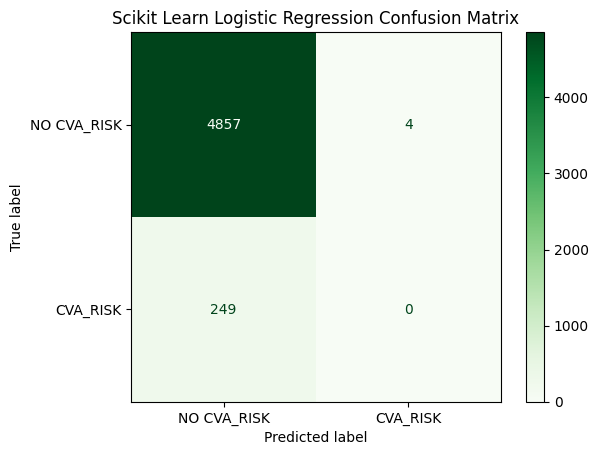

Precision: 0.0
Recall: 0.0
F1 score: nan


/var/folders/m6/yj4v5zq9371g9y20x6jsv86w0000gn/T/ipykernel_62186/1541372135.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return 2 * precision * recall / (precision + recall)


In [67]:
# testing for scikit learn logistic regression
sk_model = SK_LogisticRegression(max_iter=1500, random_state=20).fit(X_train, y_train)
sk_model_pred = sk_model.predict(X)

print('Train accuracy:', sk_model.score(X_train, y_train))
print('Test accuracy:', sk_model.score(X_test, y_test))

sk_lr = calculate_plot_confusion_matrix(T, sk_model_pred, 'Scikit Learn Logistic Regression Confusion Matrix')
precision = calculate_precision(sk_lr)
recall = calculate_recall(sk_lr)
f1_score = calculate_f1_score(sk_lr)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

results['Scikit Learn Logistic Regression'] = {
    'Train accuracy': sk_model.score(X_train, y_train),
    'Test accuracy': sk_model.score(X_test, y_test),
    'Precision': precision,
    'Recall': recall,
    'F1 score': f1_score
}



### MLP (Multi-layered Perceptron)

In [68]:
class Layer:
    '''base class for all neural network layers. It defines the interface that all derived layer classes must implement.'''

    def forward(self, x: np.ndarray) -> np.ndarray:
        '''compute the forward pass of the layer.
           Takes input x (a numpy array) and returns the transformed output.'''
        raise NotImplementedError
        
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        '''compute the backward pass (i.e., gradients) of the layer.
           Takes input x and gradient dy with respect to the output,
           and returns the gradient with respect to the input.'''
        raise NotImplementedError
        
    def update(self, *args, **kwargs):
        '''update the layer's parameters.
           Takes variable arguments for flexibility.'''
        pass

In [69]:
class FeedForwardNetwork:
    '''represents a neural network composed of multiple layers.'''
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        # List of layer objects that define the architecture of the network
        
    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x
    
    def backward(self, dy: np.ndarray) -> np.ndarray:
        for x, layer in zip(reversed(self._inputs), reversed(self.layers)):
            dy = layer.backward(x, dy)
        return dy
    
    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)

In [70]:
class Linear(Layer):
    '''represents a fully connected layer in a neural network.'''
    
    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))
        
        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)
   
    def forward(self, x: np.ndarray) -> np.ndarray:
        self.x = x
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        self.dweight = np.dot(self.x.T, dy)
        self.dbias = np.sum(dy, axis=0)
        return np.dot(dy, self.weight.T)
    
    def update(self, mode='SGD', lr=0.001, mu=0.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        else:
            raise ValueError('mode should be SGD, not ' + str(mode))

In [71]:
class ReLU(Layer):
    '''represents a ReLU (Rectified Linear Unit) activation layer.'''
    
    def __init__(self) -> None:
        pass
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        return np.maximum(0, x)
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        return dy * (x > 0)

In [72]:
class CrossEntropy:
    '''combines the softmax function and the cross-entropy loss.'''
    
    def __init__(self):
        pass
    
    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps,axis = 1).reshape(-1,1)

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        self.y = y
        self.t = t
        self.p = self.softmax(y)
        return -np.mean(np.log(self.p[np.arange(len(t)), t]))
    
    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        self.p = self.softmax(y)
        self.p[np.arange(len(t)), t] -= 1
        return self.p / len(t)


In [73]:
def accuracy(y: np.ndarray, t: np.ndarray) -> float:
    '''calculates the accuracy of the predictions.'''
    return np.mean(np.argmax(y, axis=1) == t)

Epoch 01 | Batch 031 | Train NLL:  0.460 | Train Acc:  94.17% | Test NLL:  0.475 | Test Acc: 92.66%
Epoch 02 | Batch 031 | Train NLL:  0.329 | Train Acc:  94.17% | Test NLL:  0.366 | Test Acc: 92.66%
Epoch 03 | Batch 031 | Train NLL:  0.294 | Train Acc:  94.17% | Test NLL:  0.338 | Test Acc: 92.66%
Epoch 04 | Batch 031 | Train NLL:  0.278 | Train Acc:  94.17% | Test NLL:  0.325 | Test Acc: 92.66%
Epoch 05 | Batch 031 | Train NLL:  0.268 | Train Acc:  94.17% | Test NLL:  0.316 | Test Acc: 92.66%
Epoch 06 | Batch 031 | Train NLL:  0.260 | Train Acc:  94.17% | Test NLL:  0.307 | Test Acc: 92.66%
Epoch 07 | Batch 031 | Train NLL:  0.254 | Train Acc:  94.17% | Test NLL:  0.300 | Test Acc: 92.66%
Epoch 08 | Batch 031 | Train NLL:  0.248 | Train Acc:  94.17% | Test NLL:  0.293 | Test Acc: 92.66%
Epoch 09 | Batch 031 | Train NLL:  0.243 | Train Acc:  94.17% | Test NLL:  0.287 | Test Acc: 92.66%
Epoch 10 | Batch 031 | Train NLL:  0.238 | Train Acc:  94.17% | Test NLL:  0.281 | Test Acc: 92.66%


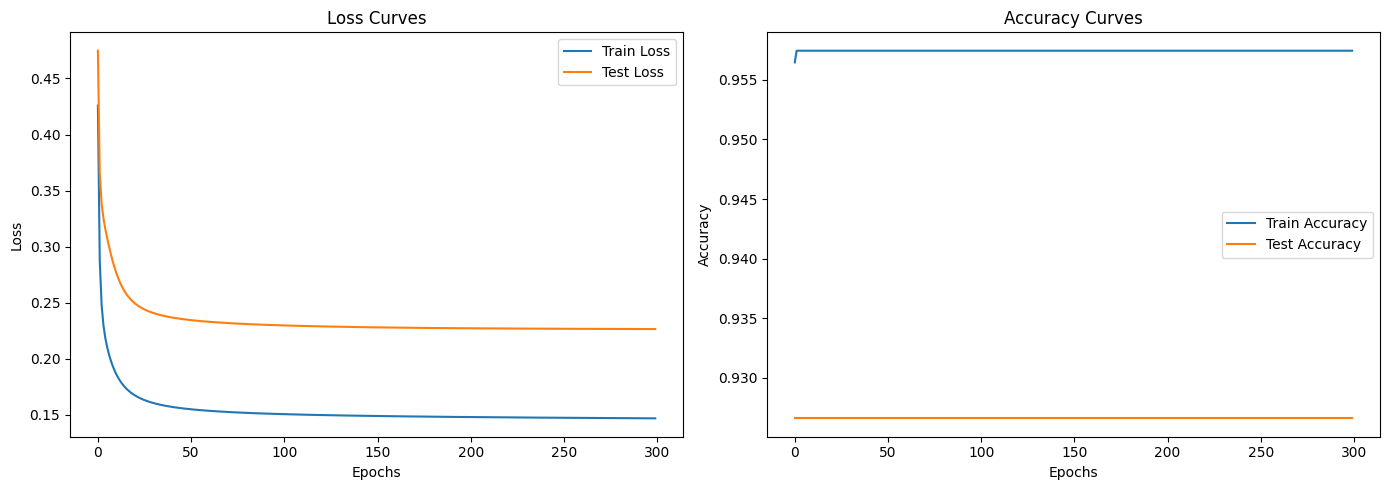

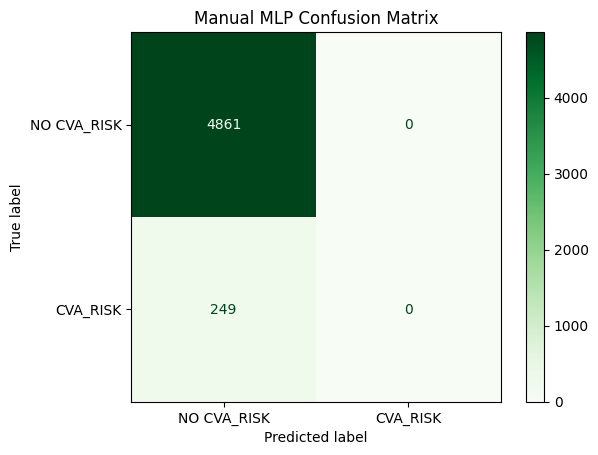

Precision: nan
Recall: 0.0
F1 score: nan


/var/folders/m6/yj4v5zq9371g9y20x6jsv86w0000gn/T/ipykernel_62186/1541372135.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])


In [74]:
BATCH_SIZE = 128
HIDDEN_UNITS = 50
EPOCHS_NO = 300
optimize_args = {'mode': 'SGD', 'lr': .01}

net = FeedForwardNetwork([Linear(X_train.shape[1], HIDDEN_UNITS),
                          ReLU(),
                          Linear(HIDDEN_UNITS, 10)])
cost_function = CrossEntropy()
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# used for pplotting the errors and accuracies for each epoch
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(EPOCHS_NO):
    for b_no, idx in enumerate(range(0, len(X_train), BATCH_SIZE)):
        x = X_train[idx:idx + BATCH_SIZE, :]
        t = y_train[idx:idx + BATCH_SIZE]
    
        y = net.forward(x)
        loss = cost_function.forward(y, t)
        dy = cost_function.backward(y, t)
        net.backward(dy)

        net.update(**optimize_args)
        
        print(f'\rEpoch {epoch + 1:02d} '
            f'| Batch {b_no:03d} '
            f'| Train NLL: {loss:6.3f} '
            f'| Train Acc: {accuracy(y, t) * 100:6.2f}% ', end='')

    # train data
    y_train_pred = net.forward(X_train, train=False)
    train_loss = cost_function.forward(y_train_pred, y_train)
    train_acc = accuracy(y_train_pred, y_train)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    
    # test_data
    y_test_pred = net.forward(X_test, train=False)
    test_loss = cost_function.forward(y_test_pred, y_test)
    test_acc = accuracy(y_test_pred, y_test)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    
    print(f'| Test NLL: {test_loss:6.3f} '
          f'| Test Acc: {test_acc * 100:3.2f}%')

print()
print('Train accuracy:', accuracy(net.forward(X_train, train=False), y_train) * 100)
print('Test accuracy:', accuracy(net.forward(X_test, train=False), y_test) * 100)

# Plotting the curves
plt.figure(figsize=(14, 5))

# loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

# accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()


manual_mlp = calculate_plot_confusion_matrix(T, np.argmax(net.forward(X, train=False), axis=1), 'Manual MLP Confusion Matrix')
precision = calculate_precision(manual_mlp)
recall = calculate_recall(manual_mlp)
f1_score = calculate_f1_score(manual_mlp)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

results['Manual MLP'] = {
    'Train accuracy': accuracy(net.forward(X_train, train=False), y_train),
    'Test accuracy': accuracy(net.forward(X_test, train=False), y_test),
    'Precision': precision,
    'Recall': recall,
    'F1 score': f1_score
}

Train accuracy: 0.9642857142857143
Test accuracy: 0.923679060665362


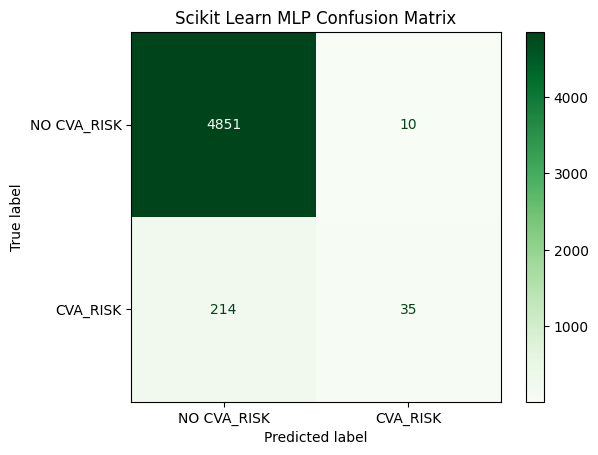

Precision: 0.7777777777777778
Recall: 0.14056224899598393
F1 score: 0.23809523809523808


In [75]:
# testing for scikit learn MLP
mlp_model = MLP_Classifier(hidden_layer_sizes=(300, 10), max_iter=1200, random_state=3, learning_rate='adaptive', learning_rate_init=0.02, solver='sgd')

'''‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss
keeps decreasing. Each time two consecutive epochs fail
to decrease training loss by at least tol, or fail to increase validation score 
by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5'''

mlp_model.fit(X_train, y_train)
mlp_model_pred = mlp_model.predict(X)

print('Train accuracy:', mlp_model.score(X_train, y_train))
print('Test accuracy:', mlp_model.score(X_test, y_test))

sk_mlp = calculate_plot_confusion_matrix(T, mlp_model_pred, 'Scikit Learn MLP Confusion Matrix')
precision = calculate_precision(sk_mlp)
recall = calculate_recall(sk_mlp)
f1_score = calculate_f1_score(sk_mlp)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

results['Scikit Learn MLP'] = {
    'Train accuracy': mlp_model.score(X_train, y_train),
    'Test accuracy': mlp_model.score(X_test, y_test),
    'Precision': precision,
    'Recall': recall,
    'F1 score': f1_score
}

### Observing the Results

In [76]:
results_df = pd.DataFrame(results).T

def highlight_max(s):
    is_max = s == s.max()
    return ['color: green' if v else '' for v in is_max]

res = results_df.transpose()
res.style.apply(highlight_max, axis=1)

,Manual Logistic Regression,Scikit Learn Logistic Regression,Manual MLP,Scikit Learn MLP
Train accuracy,0.947162,0.956703,0.957436,0.964286
Test accuracy,0.918787,0.925636,0.926614,0.923679
Precision,0.068966,0.000000,nan,0.777778
Recall,0.016064,0.000000,0.000000,0.140562
F1 score,0.026059,nan,nan,0.238095
